In [1]:
#Please run this first


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.model_selection import train_test_split
from scipy import spatial
import copy
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Load ratings


In [2]:
ratings_small = pd.read_csv('ratings_small.csv',header = 0)
ratings_small = ratings_small.drop(columns = 'Unnamed: 0')
ratings_small = ratings_small.drop(columns = 'timestamp')
ratings_small.head()

,userId,movieId,rating
0,31,83613,5.0
1,31,84944,4.0
2,31,85510,4.0
3,31,86332,5.0
4,31,86880,5.0


Find avg number of movies watched

In [3]:
avg_movies_watched = ratings_small["userId"].value_counts().mean()
avg_movies_watched

18.213443396226417

Get the list of users and another list of count of the movies watched by them as a one to one mapping between the two lists

In [4]:
User = ratings_small["userId"].value_counts().index.tolist()
Count = ratings_small["userId"].value_counts().tolist()

In [5]:
# for i in Count:
#     if i < avg_movies_watched:
#         ind = Count.index(i)
#         break
# ST_User = User[ind:]
# len(ST_User)

In [6]:
# dict_train = {}
# dict_test = {}
# for i in ST_User:
#     Filter = ratings_small["userId"] == i
    
#     List = []
#     for j in ratings_small[Filter]["movieId"]:
#         List.append(j)
        
#     if len(List)>1:
        
#         train, test = train_test_split(List, test_size=0.30, random_state=42)
#         dict_train[i] = train
#         dict_test[i] = test
    
#     else:
#         pass

Split the movies watched by each user into two sets- training and testing set such that the testing set has atleast 4 movies for a user while the training set has the remaining ones.

In [7]:
dict_train = {}
dict_test = {}
for i in User:
    Filter = ratings_small["userId"] == i
    
    List = []
    for j in ratings_small[Filter]["movieId"]:
        List.append(j)
        
    if len(List)>4:
        
        test = np.random.choice(List,3).tolist()
        dict_test[i] = test
        dict_train[i] = [i for i in List if i not in test]
        

    else:
        pass

In [8]:
dict_train

{31: [83613,
  84944,
  85510,
  86880,
  86911,
  87222,
  87232,
  87430,
  88125,
  88744,
  89745,
  91500,
  91529,
  95167,
  98809,
  102125,
  102445,
  106487,
  106489,
  112852,
  118696,
  125916],
 71: [89085,
  104337,
  104841,
  104879,
  104944,
  106100,
  106766,
  106782,
  106916,
  107069,
  107141,
  109374,
  109673,
  110730,
  111360,
  111622,
  111921,
  112138,
  112290,
  112556,
  116797,
  117511,
  117590],
 82: [83613,
  86190,
  86332,
  86880,
  87192,
  87222,
  87232,
  87306,
  87430,
  88140,
  88235,
  88744,
  89085,
  89118,
  89305,
  89753,
  89759,
  89864,
  90866],
 85: [88125, 89745, 92259, 97921],
 96: [84392,
  84954,
  85414,
  86298,
  86332,
  86355,
  86833,
  87232,
  87869,
  88125,
  88129,
  88140,
  88163,
  88810,
  89745,
  90249,
  90647,
  90719,
  91500,
  91529,
  91542,
  91630,
  91658,
  93287,
  93510,
  94070,
  94266,
  94864,
  94896,
  95167,
  95875,
  96079,
  96610,
  96821,
  97304,
  97324,
  97752,
  97860,

Find the users who have watched the same movies as the movies watched by a user in the test set.

In [9]:
dic_sim = {}
for i in list(dict_test.keys()):
    sim_user = {}
    for j in dict_test.get(i):
        shortlist = list(ratings_small[ratings_small["movieId"]==j]["userId"].values)
        shortlist.remove(i)
        if len(shortlist)>0:
            sim_user[j] = shortlist
            dic_sim[i] = sim_user

dic_sim provides the dictionary where the key is the user and the list of values is that of the other users who have watched the movies watched 

In [10]:

dic_sim

{31: {86332: [82,
   96,
   182,
   285,
   359,
   409,
   534,
   551,
   586,
   631,
   637,
   692,
   713,
   724,
   768,
   786,
   843,
   866,
   898,
   916,
   948,
   964,
   979,
   1048,
   1065,
   1244,
   1268,
   1272,
   1339,
   1447,
   1518,
   1559,
   1602,
   1703,
   1906,
   1958,
   1968,
   2047,
   2065,
   2161,
   2270,
   2274,
   2295,
   2301,
   2333,
   2367,
   2423,
   2568,
   2657,
   2684,
   2702,
   2742,
   2797,
   2810,
   2898,
   2928,
   2930,
   2988,
   3024,
   3029,
   3079,
   3163,
   3251,
   3257,
   3266,
   3268,
   3289,
   3364,
   3386,
   3397,
   3487,
   3629,
   3668,
   3797,
   3858,
   3864,
   3907,
   3922,
   3971,
   4021,
   4039,
   4055,
   4066,
   4087,
   4181,
   4222,
   4270,
   4357,
   4488,
   4575,
   4587,
   4600,
   4605,
   4651,
   4759,
   4834,
   4851,
   4910,
   4967,
   4968,
   5042,
   5057,
   5157,
   5273,
   5475,
   5511,
   5622,
   5800,
   5840,
   5871,
   5954,
   5973,
   604

Read the movies small cvs which has the one hot encoded data of the movie id and the genres

In [11]:
# create user_genre first in each loop for the 70% movies of the user we are predicting rating for
movies_small = pd.read_csv('movies_small.csv',header = 0)
movies_small = movies_small.drop(columns = 'Unnamed: 0')
movies_small.head()

,movieId,title,genres,name,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83349,"Green Hornet, The (2011)","['Action', 'Comedy', 'Crime', 'Fantasy', 'Thri...","Green Hornet, The",2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83480,Season of the Witch (2011),"['Adventure', 'Drama', 'Fantasy']",Season of the Witch,2011,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83613,Cowboys & Aliens (2011),"['Action', 'Sci-Fi', 'Thriller', 'Western', 'I...",Cowboys & Aliens,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,83910,"Dilemma, The (2011)","['Comedy', 'Drama']","Dilemma, The",2011,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This part of code is not mandatory but was added in the previous version where we were finding short term users. Currently though we are cosnidering all the users for our analysis since we want to find the trend in the users. 

In [12]:
ratings_small_stuser = ratings_small[ratings_small["userId"].isin(User)]

In [13]:
ratings_small_stuser

,userId,movieId,rating
0,31,83613,5.0
1,31,84944,4.0
2,31,85510,4.0
3,31,86332,5.0
4,31,86880,5.0
...,...,...,...
15440,7100,86835,5.0
15441,7100,87485,4.0
15442,7100,90405,5.0
15443,7111,89745,4.5


Get the list of ratings for users who are in the training set.

In [14]:
ratings_small_train = pd.DataFrame()
for i in list(dict_train.keys()):
    inter = ratings_small_stuser[ratings_small_stuser["userId"]==i]
    Filter = inter[inter["movieId"].isin(dict_train.get(i))]
    ratings_small_train = pd.concat([ratings_small_train,Filter])

In [15]:
ratings_small_train.head()
# ratings_small_train["userId"].unique().shape

,userId,movieId,rating
6421,3029,83613,2.5
6422,3029,84374,3.0
6423,3029,84392,2.5
6424,3029,84395,1.5
6425,3029,84637,3.0


MOvie ratings is the merged version of the ratings given to every movie

In [16]:
movie_ratings_train = movies_small.merge(ratings_small_train, on = 'movieId')

In [17]:
movie_ratings_train = movie_ratings_train.drop('(no genres listed)',axis =1)
movie_ratings_train.head()

,movieId,title,genres,name,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,userId,rating
0,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2568,2.5
1,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2657,3.0
2,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2898,4.0
3,83349,"Green Hornet, The (2011)","['Action', 'Comedy', 'Crime', 'Fantasy', 'Thri...","Green Hornet, The",2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843,1.0
4,83349,"Green Hornet, The (2011)","['Action', 'Comedy', 'Crime', 'Fantasy', 'Thri...","Green Hornet, The",2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4967,3.5


In [18]:
movie_ratings_train = movie_ratings_train.drop(['title', 'name', 'year', 'genres', 'movieId'],axis=1)

Assign ratings to each genre with the ratings given to each movie

In [19]:
movie_ratings_train['Action'] = movie_ratings_train['Action']*movie_ratings_train['rating']
movie_ratings_train['Adventure'] = movie_ratings_train['Adventure']*movie_ratings_train['rating']
movie_ratings_train['Animation'] = movie_ratings_train['Animation']*movie_ratings_train['rating']

movie_ratings_train['Children'] = movie_ratings_train['Children']*movie_ratings_train['rating']
movie_ratings_train['Comedy'] = movie_ratings_train['Comedy']*movie_ratings_train['rating']
movie_ratings_train['Crime'] = movie_ratings_train['Crime']*movie_ratings_train['rating']

movie_ratings_train['Documentary'] = movie_ratings_train['Documentary']*movie_ratings_train['rating']
movie_ratings_train['Drama'] = movie_ratings_train['Drama']*movie_ratings_train['rating']

movie_ratings_train['Fantasy'] = movie_ratings_train['Fantasy']*movie_ratings_train['rating']
movie_ratings_train['Film-Noir'] = movie_ratings_train['Film-Noir']*movie_ratings_train['rating']

movie_ratings_train['Horror'] = movie_ratings_train['Horror']*movie_ratings_train['rating']

movie_ratings_train['IMAX'] = movie_ratings_train['IMAX']*movie_ratings_train['rating']

movie_ratings_train['Musical'] = movie_ratings_train['Musical']*movie_ratings_train['rating']
movie_ratings_train['Mystery'] = movie_ratings_train['Mystery']*movie_ratings_train['rating']

movie_ratings_train['Romance'] = movie_ratings_train['Romance']*movie_ratings_train['rating']

movie_ratings_train['Sci-Fi'] = movie_ratings_train['Sci-Fi']*movie_ratings_train['rating']

movie_ratings_train['Thriller'] = movie_ratings_train['Thriller']*movie_ratings_train['rating']

movie_ratings_train['War'] = movie_ratings_train['War']*movie_ratings_train['rating']
movie_ratings_train['Western'] = movie_ratings_train['Western']*movie_ratings_train['rating']

user_id_list = list(movie_ratings_train['userId'].unique())
# len(user_id_list)

In [20]:
movie_ratings_train

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,userId,rating
0,0.0,0.0,0.0,0.0,2.5,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2568,2.5
1,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2657,3.0
2,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2898,4.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843,1.0
4,0.0,0.0,0.0,3.5,3.5,0.0,0.0,3.5,3.5,3.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,4967,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1339,4.5
13340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5731,4.0
13341,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2423,1.0
13342,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,3397,3.5


User rating dict computes the average rating given by a user to all the movies they have watched in that genre.

In [21]:
user_rating_dict = {}

for i in user_id_list:
  user_rating_dict[i] = movie_ratings_train[movie_ratings_train['userId'] == i].mean()



In [22]:
user_rating_dict

{31: Adventure       3.090909
 Animation       0.522727
 Children        0.522727
 Comedy          0.477273
 Fantasy         1.295455
 Romance         0.000000
 Drama           0.636364
 Action          3.227273
 Crime           0.227273
 Thriller        1.204545
 Horror          0.000000
 Mystery         0.227273
 Sci-Fi          1.840909
 IMAX            2.363636
 Documentary     0.000000
 War             0.204545
 Musical         0.000000
 Western         0.409091
 Film-Noir       0.000000
 userId         31.000000
 rating          4.000000
 dtype: float64, 71: Adventure       0.000000
 Animation       0.000000
 Children        0.000000
 Comedy          1.217391
 Fantasy         0.000000
 Romance         0.413043
 Drama           3.021739
 Action          0.869565
 Crime           0.673913
 Thriller        0.847826
 Horror          0.000000
 Mystery         0.152174
 Sci-Fi          0.500000
 IMAX            0.543478
 Documentary     0.000000
 War             0.347826
 Musical      

In [23]:
user_genre_train = pd.DataFrame(user_rating_dict)

user_genre_train = user_genre_train.T

user_genre_train = user_genre_train.drop(['rating', 'userId'],axis=1)

In [24]:
user_genre_train.head()
# user_genre_train.iloc[1]

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
2568,0.591463,0.113821,0.079268,0.979675,0.323171,0.518293,1.278455,0.997967,0.439024,0.654472,0.258130,0.176829,0.680894,0.556911,0.016260,0.063008,0.044715,0.020325,0.008130
2657,1.510870,0.195652,0.190217,0.559783,0.728261,0.228261,1.369565,2.146739,0.407609,1.000000,0.119565,0.255435,1.244565,1.500000,0.000000,0.239130,0.076087,0.070652,0.038043
2898,0.571429,0.000000,0.042857,1.671429,0.285714,0.464286,1.428571,1.128571,0.664286,1.442857,0.092857,0.457143,0.600000,0.400000,0.000000,0.135714,0.000000,0.000000,0.050000
843,0.185824,0.063218,0.026820,0.580460,0.162835,0.295019,1.262452,0.419540,0.385057,0.484674,0.044061,0.055556,0.203065,0.170498,0.157088,0.038314,0.022989,0.011494,0.015326
4967,1.509317,0.580745,0.335404,1.354037,0.552795,0.145963,0.698758,2.096273,0.531056,0.813665,0.251553,0.183230,1.158385,1.372671,0.049689,0.155280,0.142857,0.049689,0.000000


In [25]:
user_genre = pd.read_csv('user_genre.csv',header = 0)
user_genre = user_genre.rename(columns={"Unnamed: 0":"userId"})
user_genre = user_genre.set_index('userId')

In [26]:
# user_genre.loc[[3029]]
user_genre.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
2568,0.997992,0.600402,0.112450,0.078313,0.989960,0.445783,0.016064,1.263052,0.319277,0.008032,0.255020,0.550201,0.044177,0.174699,0.512048,0.688755,0.662651,0.062249,0.020080
2657,2.157895,1.505263,0.189474,0.184211,0.542105,0.394737,0.000000,1.368421,0.705263,0.036842,0.115789,1.489474,0.073684,0.247368,0.221053,1.284211,1.047368,0.231579,0.105263
2898,1.184932,0.650685,0.000000,0.041096,1.650685,0.636986,0.000000,1.417808,0.321918,0.047945,0.089041,0.486301,0.000000,0.438356,0.493151,0.575342,1.438356,0.130137,0.000000
3694,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
5443,1.468750,0.812500,0.000000,0.312500,1.093750,0.968750,0.281250,2.312500,0.375000,0.281250,0.000000,0.500000,0.000000,0.000000,0.375000,0.531250,0.781250,0.031250,0.000000


As seen above the user genre and the user genre train have been created usingthe same nethodlogy except that the train is created by assuming the that training set is the only set of movies watched by the users. the user genre df is for the universal set.

In [27]:
user_genre_train.head(10)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
2568,0.591463,0.113821,0.079268,0.979675,0.323171,0.518293,1.278455,0.997967,0.439024,0.654472,0.258130,0.176829,0.680894,0.556911,0.016260,0.063008,0.044715,0.020325,0.008130
2657,1.510870,0.195652,0.190217,0.559783,0.728261,0.228261,1.369565,2.146739,0.407609,1.000000,0.119565,0.255435,1.244565,1.500000,0.000000,0.239130,0.076087,0.070652,0.038043
2898,0.571429,0.000000,0.042857,1.671429,0.285714,0.464286,1.428571,1.128571,0.664286,1.442857,0.092857,0.457143,0.600000,0.400000,0.000000,0.135714,0.000000,0.000000,0.050000
843,0.185824,0.063218,0.026820,0.580460,0.162835,0.295019,1.262452,0.419540,0.385057,0.484674,0.044061,0.055556,0.203065,0.170498,0.157088,0.038314,0.022989,0.011494,0.015326
4967,1.509317,0.580745,0.335404,1.354037,0.552795,0.145963,0.698758,2.096273,0.531056,0.813665,0.251553,0.183230,1.158385,1.372671,0.049689,0.155280,0.142857,0.049689,0.000000
3907,0.484177,0.129747,0.120253,0.829114,0.237342,0.180380,1.250000,0.838608,0.313291,0.920886,0.215190,0.205696,0.474684,0.392405,0.123418,0.079114,0.018987,0.037975,0.047468
4222,1.776978,0.712230,0.384892,1.374101,0.737410,0.183453,1.428058,1.902878,0.348921,0.838129,0.176259,0.298561,1.273381,1.607914,0.000000,0.212230,0.176259,0.115108,0.057554
370,0.726277,0.244526,0.193431,1.259124,0.375912,0.270073,0.992701,1.025547,0.408759,0.788321,0.193431,0.350365,0.839416,0.609489,0.000000,0.083942,0.051095,0.124088,0.025547
5954,0.865741,0.097222,0.097222,1.074074,0.300926,0.287037,1.745370,1.212963,0.449074,0.833333,0.120370,0.203704,1.180556,0.944444,0.185185,0.101852,0.087963,0.000000,0.000000
4605,0.966019,0.378641,0.184466,1.043689,0.441748,0.242718,0.966019,1.330097,0.291262,0.635922,0.189320,0.242718,1.000000,0.917476,0.043689,0.101942,0.000000,0.077670,0.043689


In [28]:
#user_genre_train = user_genre_train.drop(columns=['movieId','year'])

Predict rating for users in the test set based on those in the training set.

In [29]:
# THIS IS FOR EUCLIDEAN SIMILARITY                     !!!!!!!!!!!!!!!!!!!!!!!!!


from scipy.spatial import distance


dict_rating = copy.deepcopy(dic_sim)
for i in list(dic_sim.keys()):                              # user we're predicting movie rating for
 for j in list(dic_sim.get(i).keys()):                   # movie rating we're predicting
        

      numerator = 0
      denominator = 0
        
      for k in list(dic_sim.get(i).get(j)):

        euclidean_dist = distance.euclidean(user_genre_train.loc[[i]],user_genre.loc[[k]])
        euclidean_similarity = 1/(1+euclidean_dist)
        rating = float(ratings_small[ratings_small["userId"] == k][ratings_small["movieId"] == j]["rating"])
            
        numerator = numerator + euclidean_similarity*rating
        denominator = denominator + euclidean_similarity
        predicted_rating = numerator/denominator
        
        
            
        dict_rating.get(i)[j] = predicted_rating
print("Done")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Done


In [30]:
# # THIS IS FOR COSINE SIMILARITY     !!!!!!!!!!!!!!!!!!!!!!!!!

# # dic_sim_final = dic_sim
# dict_rating = copy.deepcopy(dic_sim)
# for i in list(dic_sim.keys()):                              # user we're predicting movie rating for
#     for j in list(dic_sim.get(i).keys()):                   # movie rating we're predicting
        
# #         total = 0
#         numerator = 0
#         denominator = 0
# #         similarity = pd.DataFrame()
# #         similarity["userId"] = np.nan
# #         similarity["cosine_similarity"] = np.nan
# #         similarity["rating"] = np.nan
        
#         for k in list(dic_sim.get(i).get(j)):
# #             if k != i:
                
#     #             similarity = pd.DataFrame()
#     #             similarity["userId"] = np.nan
#     #             similarity["cosine_similarity"] = np.nan
#     #             similarity["rating"] = np.nan

# #                 Add = pd.DataFrame()
#             cosine_similarity = 1 - spatial.distance.cosine(user_genre_train.loc[[i]],user_genre.loc[[k]])
#             rating = float(ratings_small[ratings_small["userId"] == k][ratings_small["movieId"] == j]["rating"])
# #             print(cosine_similarity)
# #             print(rating)
# #             similarity["userId"], similarity["cosine_similarity"], similarity["rating"] = [k, cosine_similarity, rating]
#             numerator = numerator + cosine_similarity*rating
#             denominator = denominator + cosine_similarity
# #         similarity = similarity[similarity['userId'] != i]
# #         similarity["product"] = similarity["cosine_similarity"]*similarity["rating"]
# #         print(similarity["product"].sum())
# #         predicted_rating = similarity["product"].sum()/similarity["cosine_similarity"].sum()
#         predicted_rating = numerator/denominator
        
        
# #             Add['userId'], Add['cosine_similarity'], Add['rating'] = [k, cosine_similarity, rating]
            
#         dict_rating.get(i)[j] = predicted_rating
#     print("Done")

In [31]:
dict_rating

{31: {86332: 3.418258468622124,
  88140: 3.3967033859906706,
  106696: 3.823644980204949},
 71: {92259: 4.172196480557489,
  106920: 3.827087569895778,
  109487: 4.006119347238346},
 82: {85881: 3.8881305127757244,
  86833: 3.4571984676312404,
  86898: 3.3237461641489854},
 85: {88810: 3.8762738580378415, 94959: 3.9088295968790026},
 96: {84944: 3.5045176895685577,
  101864: 3.2635008831584353,
  111362: 3.825973156073664},
 98: {88125: 3.891209759308025, 91658: 4.085288670840571},
 107: {89745: 3.9321721704983443,
  102903: 3.3689172141864114,
  112852: 3.7144576879942006},
 133: {94959: 3.858019856630853, 104272: 3.943121387458721},
 136: {88125: 3.8968400609192444,
  95167: 3.538310385368993,
  106920: 3.863799056407117},
 162: {86911: 3.120732842424103,
  89745: 3.89378064608073,
  98809: 3.8023714327051468},
 182: {84772: 3.2744880246722765,
  89030: 3.2390166155886186,
  89190: 2.423778893573849},
 208: {91571: 3.035230767893776,
  102445: 3.8047403252249365,
  103027: 3.82873183

In [32]:
dic_sim.get(4464)

{97913: [96,
  215,
  271,
  318,
  370,
  466,
  572,
  586,
  614,
  631,
  710,
  713,
  808,
  1048,
  1339,
  1559,
  1588,
  1602,
  1678,
  1848,
  1968,
  2047,
  2197,
  2295,
  2301,
  2367,
  2423,
  2544,
  2568,
  2657,
  2713,
  3020,
  3029,
  3031,
  3171,
  3487,
  3563,
  3660,
  4222,
  4270,
  4347,
  4399,
  4411,
  4488,
  4537,
  4587,
  4855,
  4967,
  5004,
  5763,
  5954,
  6112,
  6171,
  6233,
  6390,
  6429,
  6454,
  6472,
  6632,
  6723,
  6899,
  6961,
  7007,
  7046],
 100344: [459, 3419, 3676]}

In [33]:
dic_sim

{31: {86332: [82,
   96,
   182,
   285,
   359,
   409,
   534,
   551,
   586,
   631,
   637,
   692,
   713,
   724,
   768,
   786,
   843,
   866,
   898,
   916,
   948,
   964,
   979,
   1048,
   1065,
   1244,
   1268,
   1272,
   1339,
   1447,
   1518,
   1559,
   1602,
   1703,
   1906,
   1958,
   1968,
   2047,
   2065,
   2161,
   2270,
   2274,
   2295,
   2301,
   2333,
   2367,
   2423,
   2568,
   2657,
   2684,
   2702,
   2742,
   2797,
   2810,
   2898,
   2928,
   2930,
   2988,
   3024,
   3029,
   3079,
   3163,
   3251,
   3257,
   3266,
   3268,
   3289,
   3364,
   3386,
   3397,
   3487,
   3629,
   3668,
   3797,
   3858,
   3864,
   3907,
   3922,
   3971,
   4021,
   4039,
   4055,
   4066,
   4087,
   4181,
   4222,
   4270,
   4357,
   4488,
   4575,
   4587,
   4600,
   4605,
   4651,
   4759,
   4834,
   4851,
   4910,
   4967,
   4968,
   5042,
   5057,
   5157,
   5273,
   5475,
   5511,
   5622,
   5800,
   5840,
   5871,
   5954,
   5973,
   604

In [34]:
dict_test_rating = copy.deepcopy(dict_rating)
for i in list(dict_rating.keys()):
    movie_rating = {}
    for j in dict_rating.get(i):
        test_rating = float(ratings_small[ratings_small["userId"] == i][ratings_small["movieId"] == j]["rating"])
        movie_rating[j] = test_rating
        dict_test_rating[i] = movie_rating

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [35]:
dict_test_rating

{31: {86332: 5.0, 88140: 5.0, 106696: 3.0},
 71: {92259: 5.0, 106920: 5.0, 109487: 5.0},
 82: {85881: 4.0, 86833: 3.5, 86898: 5.0},
 85: {88810: 5.0, 94959: 1.5},
 96: {84944: 3.5, 101864: 3.0, 111362: 4.5},
 98: {88125: 5.0, 91658: 4.0},
 107: {89745: 5.0, 102903: 5.0, 112852: 5.0},
 133: {94959: 4.0, 104272: 4.5},
 136: {88125: 5.0, 95167: 5.0, 106920: 3.5},
 162: {86911: 2.0, 89745: 3.0, 98809: 4.5},
 182: {84772: 4.0, 89030: 3.0, 89190: 4.0},
 208: {91571: 4.0, 102445: 2.5, 103027: 4.0},
 213: {91500: 4.5, 92259: 5.0, 97304: 5.0},
 215: {89864: 4.0, 102800: 4.0, 114670: 2.5},
 248: {88163: 3.0, 89840: 3.5, 91630: 3.0},
 260: {109487: 3.0, 112183: 5.0, 112556: 3.0},
 271: {96079: 4.0, 106642: 4.0},
 279: {91542: 4.0, 91653: 3.0},
 284: {88129: 3.0, 89745: 3.0, 106487: 2.5},
 285: {88744: 4.5, 106487: 5.0},
 318: {103228: 3.5, 107141: 3.0, 112623: 4.0},
 342: {89118: 4.5, 91077: 4.0},
 348: {89337: 4.5, 91094: 3.5, 91134: 4.0},
 359: {85131: 3.5, 86332: 3.5, 86644: 3.5},
 370: {87222

In [36]:
count = 0
sum_ = 0
for i in list(dict_rating.keys()):                              # user we're predicting movie rating for
    for j in list(dict_rating.get(i).keys()):
#         print(dict_rating.get(i).get(j))
#         for k in dict_rating.get(i).get(j):
#             print(k)
        count += 1
        diff = dict_rating.get(i).get(j) - dict_test_rating.get(i).get(j)
        squared = diff**2
        sum_ += squared

ST_rmse_DCF = (sum_/count)**(1/2)

ST_rmse_DCF

0.9300554051491152

In [37]:
numvsrmse = {}
for i in range(1, 500):
    numvsrmse[i] = []

numvsrmse

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109: [],
 110: [],
 111: []

In [38]:
# count = 0
# sum_ = 0
# watched = avg_movies_watched


for i in list(dict_rating.keys()):                              # user we're predicting movie rating for
    for j in list(dict_rating.get(i).keys()):
#         print(dict_rating.get(i).get(j))
#         for k in dict_rating.get(i).get(j):
#             print(k)

#         count += 1
        diff = dict_rating.get(i).get(j) - dict_test_rating.get(i).get(j)
        squared = diff**2
        
        numwatched = len(dict_train.get(i))
        numvsrmse[numwatched].append(squared)
#       sum_ += squared

        
            
# ST_rmse_DCF = (sum_/count)**(1/2)

# ST_rmse_DCF
for i in list(numvsrmse.keys()):
    list_ = numvsrmse.get(i)
    avg = np.mean(list_)
    numvsrmse[i] = avg**(1/2)
    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
numvsrmse

{1: nan,
 2: 0.9124477038244818,
 3: 1.1395306753280472,
 4: 0.9523112518482972,
 5: 0.9770041381970579,
 6: 0.9060633116014157,
 7: 0.8771126854545912,
 8: 0.9190039496932322,
 9: 0.8995233452461515,
 10: 0.821991875949264,
 11: 0.8710383950775406,
 12: 1.2023716354356069,
 13: 0.8721964026178791,
 14: 0.8736149672893504,
 15: 0.976993611908582,
 16: 0.7209988555434742,
 17: 0.7406620911659465,
 18: 0.8141990832472121,
 19: 0.8151800373568346,
 20: 0.9461360262773603,
 21: 1.2439749554197914,
 22: 0.8923198720439649,
 23: 0.9136289248723628,
 24: 0.704294615721742,
 25: 1.0939389726651767,
 26: 1.2400600357817304,
 27: 0.5552455409510082,
 28: 0.9721241032287836,
 29: 1.0628849531580578,
 30: 0.4393879819688345,
 31: 0.5688113741769992,
 32: 0.7177342762144776,
 33: 0.9647247468157499,
 34: 0.8244798221576688,
 35: 0.30584354795916746,
 36: 0.6507115099860935,
 37: 1.1426374652855062,
 38: 0.9076356195870261,
 39: 1.143049516637432,
 40: 0.3468847486723466,
 41: 0.8923324318094205,
 4

In [40]:
numvsrmse[162]
from math import isnan
clean_dict = {k: numvsrmse[k] for k in numvsrmse if not isnan(numvsrmse[k])}
clean_dict

{2: 0.9124477038244818,
 3: 1.1395306753280472,
 4: 0.9523112518482972,
 5: 0.9770041381970579,
 6: 0.9060633116014157,
 7: 0.8771126854545912,
 8: 0.9190039496932322,
 9: 0.8995233452461515,
 10: 0.821991875949264,
 11: 0.8710383950775406,
 12: 1.2023716354356069,
 13: 0.8721964026178791,
 14: 0.8736149672893504,
 15: 0.976993611908582,
 16: 0.7209988555434742,
 17: 0.7406620911659465,
 18: 0.8141990832472121,
 19: 0.8151800373568346,
 20: 0.9461360262773603,
 21: 1.2439749554197914,
 22: 0.8923198720439649,
 23: 0.9136289248723628,
 24: 0.704294615721742,
 25: 1.0939389726651767,
 26: 1.2400600357817304,
 27: 0.5552455409510082,
 28: 0.9721241032287836,
 29: 1.0628849531580578,
 30: 0.4393879819688345,
 31: 0.5688113741769992,
 32: 0.7177342762144776,
 33: 0.9647247468157499,
 34: 0.8244798221576688,
 35: 0.30584354795916746,
 36: 0.6507115099860935,
 37: 1.1426374652855062,
 38: 0.9076356195870261,
 39: 1.143049516637432,
 40: 0.3468847486723466,
 41: 0.8923324318094205,
 42: 1.0056

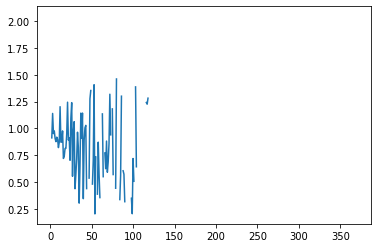

In [41]:
lists = sorted(numvsrmse.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

# m, b = np.polyfit(x, y, 1)


plt.plot(x, y)
# plt.plot(x, m*x + b)
plt.show()

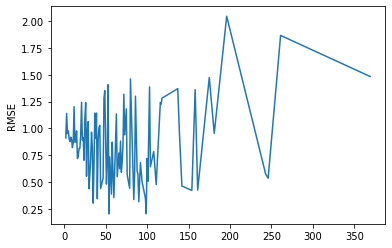

In [42]:
df_numvsrmse = pd.DataFrame.from_dict(numvsrmse,orient = "index",columns =['RMSE'])
df_numvsrmse = df_numvsrmse.dropna()
import seaborn as sns;
ax = sns.lineplot(x=df_numvsrmse.index, y="RMSE", data=df_numvsrmse)



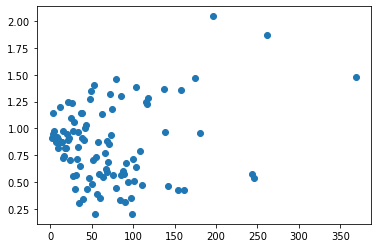

In [43]:
x, y = df_numvsrmse.index, df_numvsrmse['RMSE']

x = pd.Series(x)
y = pd.Series(y)
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, 'o')
# plt.plot(x, float(m)*float(x) + b)
plt.show()

In [44]:
avg_rmse = np.mean(df_numvsrmse['RMSE'])
avg_rmse


0.8502480403928946

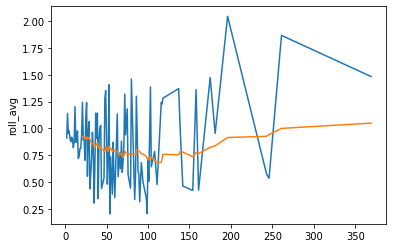

In [45]:
df_numvsrmse = df_numvsrmse.assign(roll_avg = df_numvsrmse['RMSE'].rolling(20).mean())
import seaborn as sns;
ax = sns.lineplot(x=df_numvsrmse.index, y="RMSE", data=df_numvsrmse)
ax = sns.lineplot(x=df_numvsrmse.index, y="roll_avg", data=df_numvsrmse)

In [46]:
df_numvsrmse = df_numvsrmse.assign(method = 'euclidean')

In [47]:
!pip install datetime
import datetime as dt
now = dt.datetime.now() # current date and time

curr_time = now.strftime("%Y_%m_%d_%H_%M_%S")

curr_time

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 235kB 6.7MB/s 


'2020_08_28_04_17_21'

In [48]:
df_numvsrmse.to_csv("/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dcf_euclidean_rmse"+curr_time+".csv")

In [49]:
import pickle
pickle.dump( dict_rating, open( "/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dict_rating_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_train, open( "/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dict_train_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_test_rating, open( "/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dict_test_rating_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_test, open( "/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dict_test_"+ curr_time+".p", "wb" ) )